In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

from torsionfit.qmscan import utils
from openeye import oechem
from openmoltools import openeye
import oenotebook

import time

In [2]:
mol_1 = openeye.smiles_to_oemol('CO')
mol_1_tagged = utils.create_mapped_smiles(mol_1)
print(mol_1_tagged)

[H:3][C:1]([H:4])([H:5])[O:2][H:6]


In [3]:
mol_2 = openeye.smiles_to_oemol(mol_1_tagged)
for atom in mol_2.GetAtoms():
    print("atom: {}, idx: {}, map: {}".format(atom, atom.GetIdx(), atom.GetMapIdx()))

atom:  0 H, idx: 0, map: 3
atom:  1 C, idx: 1, map: 1
atom:  2 H, idx: 2, map: 4
atom:  3 H, idx: 3, map: 5
atom:  4 O, idx: 4, map: 2
atom:  5 H, idx: 5, map: 6


In [4]:
# Get atom map from qmscan.utils.get_atom_map. This uses MCSSearch 
atom_map = utils.get_atom_map(tagged_smiles=mol_1_tagged, molecule=mol_2)
print(atom_map)

14:49:30 INFO torsionFit: Match SMILES: [H:3][C:1]([H:5])([H:4])[O:2][H:6]
14:49:30 INFO torsionFit: MCSS took 0.0008242130279541016 seconds
{3: 0, 1: 1, 4: 3, 5: 2, 2: 4, 6: 5}


In [7]:
# Try subsearch
ss = oechem.OESubSearch(mol_1_tagged)
oechem.OEPrepareSearch(mol_2, ss)
ss.SetMaxMatches(1)
atom_map_ss = {}
for count, match in enumerate(ss.Match(mol_2)):
    for ma in match.GetAtoms():
        atom_map_ss[ma.pattern.GetMapIdx()] = ma.target.GetIdx()
print(atom_map_ss)

# It seems like the hydrogens don't match up exactly.

{3: 0, 1: 1, 4: 2, 5: 3, 2: 4, 6: 5}


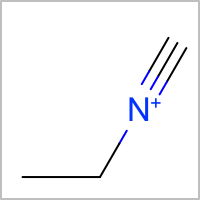

In [9]:
# Now for a more complicated molecule
smiles = 'C#[N+]CC'
oenotebook.draw_smiles(smiles)

In [10]:
mol_cncc = openeye.smiles_to_oemol(smiles)
tagged_smiles_cncc = utils.create_mapped_smiles(mol_cncc)
print(tagged_smiles_cncc)

[H:5][C:1]#[N+:2][C:3]([H:6])([H:7])[C:4]([H:8])([H:9])[H:10]


In [11]:
mol_cncc_2 = openeye.smiles_to_oemol(tagged_smiles_cncc)
for atom in mol_cncc_2.GetAtoms():
    print("map: {}, idx: {}, atom: {}".format(atom.GetMapIdx(), atom.GetIdx(), atom ))

map: 5, idx: 0, atom:  0 H
map: 1, idx: 1, atom:  1 C
map: 2, idx: 2, atom:  2 N
map: 3, idx: 3, atom:  3 C
map: 6, idx: 4, atom:  4 H
map: 7, idx: 5, atom:  5 H
map: 4, idx: 6, atom:  6 C
map: 8, idx: 7, atom:  7 H
map: 9, idx: 8, atom:  8 H
map: 10, idx: 9, atom:  9 H


In [12]:
# Try with mcss
atom_map_cncc = utils.get_atom_map(molecule=mol_cncc_2, tagged_smiles=tagged_smiles_cncc)
print(atom_map_cncc)

15:05:02 INFO torsionFit: Match SMILES: [H:5][C:1]#[N+:2][C:3]([H:7])([H:6])[C:4]([H:8])([H:9])[H:10]
15:05:02 INFO torsionFit: MCSS took 0.0013451576232910156 seconds
{5: 0, 1: 1, 2: 2, 3: 3, 6: 5, 7: 4, 4: 6, 8: 7, 9: 8, 10: 9}


In [13]:
# Try with ss
ss = oechem.OESubSearch(tagged_smiles_cncc)
oechem.OEPrepareSearch(mol_cncc_2, ss)
ss.SetMaxMatches(1)
atom_map_ss = {}
for count, match in enumerate(ss.Match(mol_cncc_2)):
    for ma in match.GetAtoms():
        atom_map_ss[ma.pattern.GetMapIdx()] = ma.target.GetIdx()
print(atom_map_ss)

{5: 0, 1: 1, 2: 2, 3: 3, 6: 4, 7: 5, 4: 6, 8: 7, 9: 8, 10: 9}


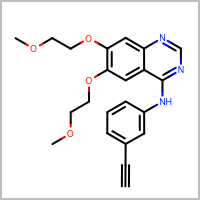

In [41]:
# Time for some kinase inhibitors
erlotinib_smiles = 'COCCOc1cc2c(cc1OCCOC)ncnc2Nc3cccc(c3)C#C'
oenotebook.draw_smiles(erlotinib_smiles)

In [42]:
erlotinib_mol = openeye.smiles_to_oemol(erlotinib_smiles)
tagged_erlotinib_smiles = utils.create_mapped_smiles(erlotinib_mol)
print(tagged_erlotinib_smiles)

[H:52][C:29]#[C:28][c:26]1[c:25]([c:24]([c:23]([c:22]([c:27]1[H:51])[N:21]([H:47])[c:20]2[c:8]3[c:7]([c:6]([c:11]([c:10]([c:9]3[n:17][c:18]([n:19]2)[H:46])[H:38])[O:12][C:13]([H:39])([H:40])[C:14]([H:41])([H:42])[O:15][C:16]([H:43])([H:44])[H:45])[O:5][C:4]([H:35])([H:36])[C:3]([H:33])([H:34])[O:2][C:1]([H:30])([H:31])[H:32])[H:37])[H:48])[H:49])[H:50]


In [43]:
erlotinib_mol_2 = openeye.smiles_to_oemol(tagged_erlotinib_smiles)
for atom in erlotinib_mol_2.GetAtoms():
    print("map: {}, idx: {}, atom: {}".format(atom.GetMapIdx(), atom.GetIdx(), atom ))

map: 52, idx: 0, atom:  0 H
map: 29, idx: 1, atom:  1 C
map: 28, idx: 2, atom:  2 C
map: 26, idx: 3, atom:  3 C
map: 25, idx: 4, atom:  4 C
map: 24, idx: 5, atom:  5 C
map: 23, idx: 6, atom:  6 C
map: 22, idx: 7, atom:  7 C
map: 27, idx: 8, atom:  8 C
map: 51, idx: 9, atom:  9 H
map: 21, idx: 10, atom: 10 N
map: 47, idx: 11, atom: 11 H
map: 20, idx: 12, atom: 12 C
map: 8, idx: 13, atom: 13 C
map: 7, idx: 14, atom: 14 C
map: 6, idx: 15, atom: 15 C
map: 11, idx: 16, atom: 16 C
map: 10, idx: 17, atom: 17 C
map: 9, idx: 18, atom: 18 C
map: 17, idx: 19, atom: 19 N
map: 18, idx: 20, atom: 20 C
map: 19, idx: 21, atom: 21 N
map: 46, idx: 22, atom: 22 H
map: 38, idx: 23, atom: 23 H
map: 12, idx: 24, atom: 24 O
map: 13, idx: 25, atom: 25 C
map: 39, idx: 26, atom: 26 H
map: 40, idx: 27, atom: 27 H
map: 14, idx: 28, atom: 28 C
map: 41, idx: 29, atom: 29 H
map: 42, idx: 30, atom: 30 H
map: 15, idx: 31, atom: 31 O
map: 16, idx: 32, atom: 32 C
map: 43, idx: 33, atom: 33 H
map: 44, idx: 34, atom: 34 H

In [44]:
atom_map_erlotinib = utils.get_atom_map(molecule=erlotinib_mol_2, tagged_smiles=tagged_erlotinib_smiles)
print(atom_map_erlotinib)

15:46:33 INFO torsionFit: Match SMILES: [H:52][C:29]#[C:28][c:26]1[c:25]([c:24]([c:23]([c:22]([c:27]1[H:51])[N:21]([H:47])[c:20]2[c:8]3[c:7]([c:6]([c:11]([c:10]([c:9]3[n:17][c:18]([n:19]2)[H:46])[H:38])[O:12][C:13]([H:40])([H:39])[C:14]([H:42])([H:41])[O:15][C:16]([H:45])([H:44])[H:43])[O:5][C:4]([H:35])([H:36])[C:3]([H:33])([H:34])[O:2][C:1]([H:30])([H:31])[H:32])[H:37])[H:48])[H:49])[H:50]
15:46:33 INFO torsionFit: MCSS took 1.300987958908081 seconds
{52: 0, 29: 1, 28: 2, 26: 3, 25: 4, 24: 5, 23: 6, 22: 7, 27: 8, 51: 9, 21: 10, 47: 11, 20: 12, 8: 13, 7: 14, 6: 15, 11: 16, 10: 17, 9: 18, 17: 19, 18: 20, 19: 21, 46: 22, 38: 23, 12: 24, 13: 25, 39: 27, 40: 26, 14: 28, 41: 30, 42: 29, 15: 31, 16: 32, 43: 35, 44: 34, 45: 33, 5: 36, 4: 37, 35: 38, 36: 39, 3: 40, 33: 41, 34: 42, 2: 43, 1: 44, 30: 45, 31: 46, 32: 47, 37: 48, 48: 49, 49: 50, 50: 51}


In [49]:
# Try with ss
ss = oechem.OESubSearch(tagged_erlotinib_smiles)
oechem.OEPrepareSearch(erlotinib_mol_2, ss)
ss.SetMaxMatches(1)
atom_map_ss = {}
t1 = time.time()
for count, match in enumerate(ss.Match(erlotinib_mol_2)):
    for ma in match.GetAtoms():
        atom_map_ss[ma.pattern.GetMapIdx()] = ma.target.GetIdx()
t2 = time.time()
print('ss took {} seconds'.format(t2-t1))
print(atom_map_ss)

ss took 0.0017161369323730469 seconds
{52: 0, 29: 1, 28: 2, 26: 3, 25: 4, 24: 5, 23: 6, 22: 7, 27: 8, 51: 9, 21: 10, 47: 11, 20: 12, 8: 13, 7: 14, 6: 15, 11: 16, 10: 17, 9: 18, 17: 19, 18: 20, 19: 21, 46: 22, 38: 23, 12: 24, 13: 25, 39: 26, 40: 27, 14: 28, 41: 29, 42: 30, 15: 31, 16: 32, 43: 33, 44: 34, 45: 35, 5: 36, 4: 37, 35: 38, 36: 39, 3: 40, 33: 41, 34: 42, 2: 43, 1: 44, 30: 45, 31: 46, 32: 47, 37: 48, 48: 49, 49: 50, 50: 51}


In [48]:
for i in range(1, len(atom_map_ss)+1):
    if not atom_map_erlotinib[i] == atom_map_ss[i]:
        print("map: {}, mcs_idx: {}, ss_idx: {}".format(i, atom_map_erlotinib[i], atom_map_ss[i]))
        atom_1 = erlotinib_mol.GetAtom(oechem.OEHasAtomIdx(i))
        atom_2 = erlotinib_mol_2.GetAtom(oechem.OEHasAtomIdx(atom_map_erlotinib[i]))
        atom_3 = erlotinib_mol_2.GetAtom(oechem.OEHasAtomIdx(atom_map_ss[i]))
        map_idx_2 = atom_2.GetMapIdx()
        map_idx_3 = atom_3.GetMapIdx()
        print("atom in original mol: {}".format(atom_1))
        print("mcss atom: {}, mcss map idx: {};  ss atom {}, ss map_idx: {}".format(atom_2, map_idx_2, atom_3, map_idx_3))
    

map: 39, mcs_idx: 27, ss_idx: 26
atom in original mol: 39 H
mcss atom: 27 H, mcss map idx: 40;  ss atom 26 H, ss map_idx: 39
map: 40, mcs_idx: 26, ss_idx: 27
atom in original mol: 40 H
mcss atom: 26 H, mcss map idx: 39;  ss atom 27 H, ss map_idx: 40
map: 41, mcs_idx: 30, ss_idx: 29
atom in original mol: 41 H
mcss atom: 30 H, mcss map idx: 42;  ss atom 29 H, ss map_idx: 41
map: 42, mcs_idx: 29, ss_idx: 30
atom in original mol: 42 H
mcss atom: 29 H, mcss map idx: 41;  ss atom 30 H, ss map_idx: 42
map: 43, mcs_idx: 35, ss_idx: 33
atom in original mol: 43 H
mcss atom: 35 H, mcss map idx: 45;  ss atom 33 H, ss map_idx: 43
map: 45, mcs_idx: 33, ss_idx: 35
atom in original mol: 45 H
mcss atom: 33 H, mcss map idx: 43;  ss atom 35 H, ss map_idx: 45


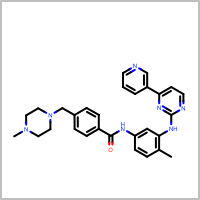

In [29]:
# Let's try something harder
imatinib_smiles = 'C5=C(C1=CN=CC=C1)N=C(NC2=C(C=CC(=C2)NC(C3=CC=C(C=C3)CN4CCN(CC4)C)=O)C)N=C5'
oenotebook.draw_smiles(imatinib_smiles)

In [30]:
imatinib_mol = openeye.smiles_to_oemol(imatinib_smiles)
imatinib_tagged_smiles = utils.create_mapped_smiles(imatinib_mol)
print(imatinib_tagged_smiles)

[H:41][c:7]1[c:8]([c:3]([c:4]([n:5][c:6]1[H:40])[H:39])[c:2]2[c:1]([c:37]([n:36][c:10]([n:9]2)[N:11]([H:43])[c:12]3[c:17]([c:16]([c:15]([c:14]([c:13]3[C:35]([H:65])([H:66])[H:67])[H:44])[H:45])[N:18]([H:47])[C:19](=[O:34])[c:20]4[c:21]([c:22]([c:23]([c:24]([c:25]4[H:51])[H:50])[C:26]([H:52])([H:53])[N:27]5[C:28]([C:29]([N:30]([C:31]([C:32]5([H:60])[H:61])([H:58])[H:59])[C:33]([H:62])([H:63])[H:64])([H:56])[H:57])([H:54])[H:55])[H:49])[H:48])[H:46])[H:68])[H:38])[H:42]


In [31]:
imatinib_mol_2 = openeye.smiles_to_oemol(imatinib_tagged_smiles)
for atom in imatinib_mol_2.GetAtoms():
    print("map: {}, idx: {}, atom: {}".format(atom.GetMapIdx(), atom.GetIdx(), atom ))

map: 41, idx: 0, atom:  0 H
map: 7, idx: 1, atom:  1 C
map: 8, idx: 2, atom:  2 C
map: 3, idx: 3, atom:  3 C
map: 4, idx: 4, atom:  4 C
map: 5, idx: 5, atom:  5 N
map: 6, idx: 6, atom:  6 C
map: 40, idx: 7, atom:  7 H
map: 39, idx: 8, atom:  8 H
map: 2, idx: 9, atom:  9 C
map: 1, idx: 10, atom: 10 C
map: 37, idx: 11, atom: 11 C
map: 36, idx: 12, atom: 12 N
map: 10, idx: 13, atom: 13 C
map: 9, idx: 14, atom: 14 N
map: 11, idx: 15, atom: 15 N
map: 43, idx: 16, atom: 16 H
map: 12, idx: 17, atom: 17 C
map: 17, idx: 18, atom: 18 C
map: 16, idx: 19, atom: 19 C
map: 15, idx: 20, atom: 20 C
map: 14, idx: 21, atom: 21 C
map: 13, idx: 22, atom: 22 C
map: 35, idx: 23, atom: 23 C
map: 65, idx: 24, atom: 24 H
map: 66, idx: 25, atom: 25 H
map: 67, idx: 26, atom: 26 H
map: 44, idx: 27, atom: 27 H
map: 45, idx: 28, atom: 28 H
map: 18, idx: 29, atom: 29 N
map: 47, idx: 30, atom: 30 H
map: 19, idx: 31, atom: 31 C
map: 34, idx: 32, atom: 32 O
map: 20, idx: 33, atom: 33 C
map: 21, idx: 34, atom: 34 C
map:

In [32]:
imatinib_atom_map = utils.get_atom_map(molecule=imatinib_mol_2, tagged_smiles=imatinib_tagged_smiles)
print(imatinib_atom_map)

15:31:14 INFO torsionFit: Match SMILES: [H:41][c:7]1[c:8]([c:3]([c:4]([n:5][c:6]1[H:40])[H:39])[c:2]2[c:1]([c:37]([n:36][c:10]([n:9]2)[N:11]([H:43])[c:12]3[c:17]([c:16]([c:15]([c:14]([c:13]3[C:35]([H:67])([H:66])[H:65])[H:44])[H:45])[N:18]([H:47])[C:19](=[O:34])[c:20]4[c:25]([c:24]([c:23]([c:22]([c:21]4[H:48])[H:49])[C:26]([H:53])([H:52])[N:27]5[C:32]([C:31]([N:30]([C:29]([C:28]5([H:54])[H:55])([H:56])[H:57])[C:33]([H:62])([H:63])[H:64])([H:59])[H:58])([H:61])[H:60])[H:50])[H:51])[H:46])[H:68])[H:38])[H:42]
15:31:14 INFO torsionFit: MCSS took 17.62543296813965 seconds
{41: 0, 7: 1, 8: 2, 3: 3, 4: 4, 5: 5, 6: 6, 40: 7, 39: 8, 2: 9, 1: 10, 37: 11, 36: 12, 10: 13, 9: 14, 11: 15, 43: 16, 12: 17, 17: 18, 16: 19, 15: 20, 14: 21, 13: 22, 35: 23, 65: 26, 66: 25, 67: 24, 44: 27, 45: 28, 18: 29, 47: 30, 19: 31, 34: 32, 20: 33, 21: 34, 22: 35, 23: 36, 24: 37, 25: 38, 51: 39, 50: 40, 26: 41, 52: 43, 53: 42, 27: 44, 28: 45, 29: 46, 30: 47, 31: 48, 32: 49, 60: 51, 61: 50, 58: 53, 59: 52, 33: 54, 62:

In [33]:
import time
# Try with ss
ss = oechem.OESubSearch(imatinib_tagged_smiles)
oechem.OEPrepareSearch(imatinib_mol_2, ss)
ss.SetMaxMatches(1)
atom_map_ss = {}
t1 = time.time()
for count, match in enumerate(ss.Match(imatinib_mol_2)):
    for ma in match.GetAtoms():
        atom_map_ss[ma.pattern.GetMapIdx()] = ma.target.GetIdx()
t2 = time.time()
print('ss took {} seconds'.format(t2-t1))
print(atom_map_ss)

ss took 0.0024971961975097656 seconds
{41: 0, 7: 1, 8: 2, 3: 3, 4: 4, 5: 5, 6: 6, 40: 7, 39: 8, 2: 9, 1: 10, 37: 11, 36: 12, 10: 13, 9: 14, 11: 15, 43: 16, 12: 17, 17: 18, 16: 19, 15: 20, 14: 21, 13: 22, 35: 23, 65: 24, 66: 25, 67: 26, 44: 27, 45: 28, 18: 29, 47: 30, 19: 31, 34: 32, 20: 33, 21: 34, 22: 35, 23: 36, 24: 37, 25: 38, 51: 39, 50: 40, 26: 41, 52: 42, 53: 43, 27: 44, 28: 45, 29: 46, 30: 47, 31: 48, 32: 49, 60: 50, 61: 51, 58: 52, 59: 53, 33: 54, 62: 55, 63: 56, 64: 57, 56: 58, 57: 59, 54: 60, 55: 61, 49: 62, 48: 63, 46: 64, 68: 65, 38: 66, 42: 67}


In [40]:
for i in range(1, len(atom_map_ss)+1):
    if not imatinib_atom_map[i] == atom_map_ss[i]:
        print("map: {}, mcs_idx: {}, ss_idx: {}".format(i, imatinib_atom_map[i], atom_map_ss[i]))
        atom_1 = imatinib_mol.GetAtom(oechem.OEHasAtomIdx(i))
        atom_2 = imatinib_mol_2.GetAtom(oechem.OEHasAtomIdx(imatinib_atom_map[i]))
        atom_3 = imatinib_mol_2.GetAtom(oechem.OEHasAtomIdx(atom_map_ss[i]))
        map_idx_2 = atom_2.GetMapIdx()
        map_idx_3 = atom_3.GetMapIdx()
        print("atom in original mol: {}".format(atom_1))
        print("mcss atom: {}, mcss map idx: {};  ss atom {}, ss map_idx: {}".format(atom_2, map_idx_2, atom_3, map_idx_3))

map: 52, mcs_idx: 43, ss_idx: 42
atom in original mol: 52 H
mcss atom: 43 H, mcss map idx: 53;  ss atom 42 H, ss map_idx: 52
map: 53, mcs_idx: 42, ss_idx: 43
atom in original mol: 53 H
mcss atom: 42 H, mcss map idx: 52;  ss atom 43 H, ss map_idx: 53
map: 58, mcs_idx: 53, ss_idx: 52
atom in original mol: 58 H
mcss atom: 53 H, mcss map idx: 59;  ss atom 52 H, ss map_idx: 58
map: 59, mcs_idx: 52, ss_idx: 53
atom in original mol: 59 H
mcss atom: 52 H, mcss map idx: 58;  ss atom 53 H, ss map_idx: 59
map: 60, mcs_idx: 51, ss_idx: 50
atom in original mol: 60 H
mcss atom: 51 H, mcss map idx: 61;  ss atom 50 H, ss map_idx: 60
map: 61, mcs_idx: 50, ss_idx: 51
atom in original mol: 61 H
mcss atom: 50 H, mcss map idx: 60;  ss atom 51 H, ss map_idx: 61
map: 65, mcs_idx: 26, ss_idx: 24
atom in original mol: 65 H
mcss atom: 26 H, mcss map idx: 67;  ss atom 24 H, ss map_idx: 65
map: 67, mcs_idx: 24, ss_idx: 26
atom in original mol: 67 H
mcss atom: 24 H, mcss map idx: 65;  ss atom 26 H, ss map_idx: 67
